# Dataset source: 

Kaggle - Fifa World Cup
https://www.kaggle.com/datasets/iamsouravbanerjee/fifa-football-world-cup-dataset

Wikipedia
https://en.wikipedia.org/wiki/List_of_FIFA_World_Cup_goalscorers

# Data Importing - Import CSV

In [1]:
##import csv files

import pandas as pd
df = pd.read_csv(r'C:\Users\SWard\DataAnalythics\Project\FIFA - 1930.csv')
df1 = pd.read_csv(r'C:\Users\SWard\DataAnalythics\Project\FIFA - 1934.csv')
df2 = pd.read_csv(r'C:\Users\SWard\DataAnalythics\Project\FIFA - 1938.csv')
df3 = pd.read_csv(r'C:\Users\SWard\DataAnalythics\Project\FIFA - 1950.csv')
df4 = pd.read_csv(r'C:\Users\SWard\DataAnalythics\Project\FIFA - 1954.csv')
df5 = pd.read_csv(r'C:\Users\SWard\DataAnalythics\Project\FIFA - 1958.csv')
df6 = pd.read_csv(r'C:\Users\SWard\DataAnalythics\Project\FIFA - 1962.csv')
df7 = pd.read_csv(r'C:\Users\SWard\DataAnalythics\Project\FIFA - 1966.csv')
df8 = pd.read_csv(r'C:\Users\SWard\DataAnalythics\Project\FIFA - 1970.csv')
df9 = pd.read_csv(r'C:\Users\SWard\DataAnalythics\Project\FIFA - 1974.csv')
df10 = pd.read_csv(r'C:\Users\SWard\DataAnalythics\Project\FIFA - 1978.csv')
df11 = pd.read_csv(r'C:\Users\SWard\DataAnalythics\Project\FIFA - 1982.csv')
df12 = pd.read_csv(r'C:\Users\SWard\DataAnalythics\Project\FIFA - 1986.csv')
df13 = pd.read_csv(r'C:\Users\SWard\DataAnalythics\Project\FIFA - 1990.csv')
df14 = pd.read_csv(r'C:\Users\SWard\DataAnalythics\Project\FIFA - 1994.csv')
df15 = pd.read_csv(r'C:\Users\SWard\DataAnalythics\Project\FIFA - 1998.csv')
df16 = pd.read_csv(r'C:\Users\SWard\DataAnalythics\Project\FIFA - 2002.csv')
df17 = pd.read_csv(r'C:\Users\SWard\DataAnalythics\Project\FIFA - 2006.csv')
df18 = pd.read_csv(r'C:\Users\SWard\DataAnalythics\Project\FIFA - 2010.csv')
df19 = pd.read_csv(r'C:\Users\SWard\DataAnalythics\Project\FIFA - 2014.csv')
df20 = pd.read_csv(r'C:\Users\SWard\DataAnalythics\Project\FIFA - 2018.csv')

In [2]:
##concateate all data frames to make master dataframe to allow for analysis

Master = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20], axis=0)

In [3]:
print(Master)


    Year  Position            Team  Games Played  Win  Draw  Loss  Goals For  \
0   1934         1           Italy             4    3     1     0         11   
1   1934         2  Czechoslovakia             4    3     0     1          9   
2   1934         3         Germany             4    3     0     1         11   
3   1934         4         Austria             4    2     0     2          7   
4   1934         5           Spain             2    1     1     0          4   
..   ...       ...             ...           ...  ...   ...   ...        ...   
27  2018        28      Costa Rica             3    0     1     2          2   
28  2018        29         Iceland             3    0     1     2          2   
29  2018        30         Morocco             3    0     1     2          2   
30  2018        31           Egypt             3    0     0     3          2   
31  2018        32          Panama             3    0     0     3          2   

    Goals Against Goal Difference  Poin

# Data Importing - Web Scraping

My Master dataset does not have the top scorer at each tournament  so i need to find this information on the internet

In [4]:
##import beautiful soup package for parsing HTML and XML documents. 
##It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping.
##https://olympics.com/en/news/fifa-world-cup-golden-boot-winners-top-goal-scorers
##https://en.wikipedia.org/wiki/List_of_FIFA_World_Cup_goalscorers

import html5lib
import requests
from bs4 import BeautifulSoup as bs
scorers = requests.get('https://olympics.com/en/news/fifa-world-cup-golden-boot-winners-top-goal-scorers')
Topscorers = bs(scorers.content, 'lxml')

##Our table can be identified by class="TableBasicstyles__Table-sc-1btx7es-1 bROVGk"
table = Topscorers.find("table", {"class":"TableBasicstyles__Table-sc-1btx7es-1 bROVGk"})

Goldenboot = pd.read_html(str(table))[0]
##Goldenboot["Year"] = Goldenboot['FIFA World Cup Edition']
##Goldenboot['Year'] = Goldenboot['World Cup Year'].str.slice(0,3)
##Goldenboot.insert(loc=1, column="Year", value=['FIFA World Cup Edition'])
print(Goldenboot)
##df['D'] = df['B'] 

    Number  FIFA World Cup Edition  \
0        1            Uruguay 1930   
1        2              Italy 1934   
2        3             France 1938   
3        4             Brazil 1950   
4        5        Switzerland 1954   
5        6             Sweden 1958   
6        7              Chile 1962   
7        8            England 1966   
8        9             Mexico 1970   
9       10       West Germany 1974   
10      11          Argentina 1978   
11      12              Spain 1982   
12      13             Mexico 1986   
13      14              Italy 1990   
14      15                USA 1994   
15      16             France 1998   
16      17  South Korea/Japan 2002   
17      18            Germany 2006   
18      19       South Africa 2010   
19      20             Brazil 2014   
20      21             Russia 2018   

                             Top Goalscorer (Country)  Goals Scored  
0                       Guillermo Stabile (Argentina)             8  
1                    Ol

# Data Preperation

In [6]:
print(Master.head())

   Year  Position            Team  Games Played  Win  Draw  Loss  Goals For  \
0  1934         1           Italy             4    3     1     0         11   
1  1934         2  Czechoslovakia             4    3     0     1          9   
2  1934         3         Germany             4    3     0     1         11   
3  1934         4         Austria             4    2     0     2          7   
4  1934         5           Spain             2    1     1     0          4   

   Goals Against Goal Difference  Points  
0              3             NaN       7  
1              6               3       6  
2              8               3       6  
3              7               0       4  
4              2               x       3  


In [7]:
## some information about the size of my data set

import numpy as np
print(Master.shape)

(444, 11)


In [8]:
##some values within the Goal Difference column are not set. Null values or values that are typos 
##Need to find all instances where no value for goal diff recorded and then set a value
##im going to create a new column and populate values using a formula
##im then going to drop the old redundant column


# 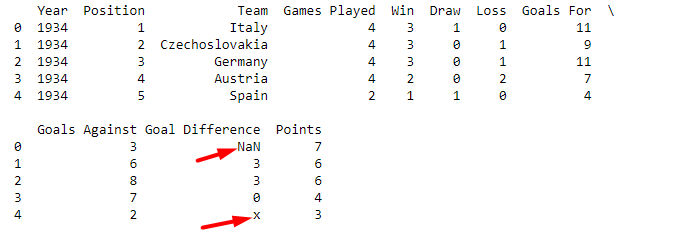

In [9]:
##looking specifically at the original goal diff column values i can see some issues  
print(Master[['Goal Difference']].to_string(index=False))

Goal Difference
            NaN
              3
              3
              0
              x
              1
              0
              0
              x
             −1
             −1
             −1
             −2
             −2
             −3
             −6
              6
             10
              3
              2
              2
              0
             −7
              0
             -1
             -2
             −1
             −1
             −2
             −3
             −6
             10
             16
             −4
             −2
              4
             −2
              1
              0
             −1
             −4
             −2
             −8
             −8
             11
             17
              5
              7
              0
              3
              0
             −1
             −1
             −1
              0
             −3
             −6
             −7
             −8
            −16
             12
        

In [11]:
##can use the Isna method to look at all null values in the original goal diff column 

nan_values = Master[Master['Goal Difference'].isna()]
print(nan_values)

   Year  Position   Team  Games Played  Win  Draw  Loss  Goals For  \
0  1934         1  Italy             4    3     1     0         11   

   Goals Against Goal Difference  Points  
0              3             NaN       7  


In [12]:
##create a function to calculate goal diff for each row and populate in a new column Updated goal diff

def calculate_GoalDiff(row):
    return row['Goals For'] - row['Goals Against']

Master.apply(calculate_GoalDiff, axis=1)

Master['UpdatedGoalDiff'] = Master.apply(calculate_GoalDiff, axis=1)

print(Master)

    Year  Position            Team  Games Played  Win  Draw  Loss  Goals For  \
0   1934         1           Italy             4    3     1     0         11   
1   1934         2  Czechoslovakia             4    3     0     1          9   
2   1934         3         Germany             4    3     0     1         11   
3   1934         4         Austria             4    2     0     2          7   
4   1934         5           Spain             2    1     1     0          4   
..   ...       ...             ...           ...  ...   ...   ...        ...   
27  2018        28      Costa Rica             3    0     1     2          2   
28  2018        29         Iceland             3    0     1     2          2   
29  2018        30         Morocco             3    0     1     2          2   
30  2018        31           Egypt             3    0     0     3          2   
31  2018        32          Panama             3    0     0     3          2   

    Goals Against Goal Difference  Poin

In [13]:
##drop original redundant column
#Updates the DataFrame in place

Master.drop(['Goal Difference'], axis = 1, inplace=True)


In [14]:
## reorder new column before Points column so index is position index 9 
colm = Master.pop("UpdatedGoalDiff")
Master.insert(9, colm.name, colm)

In [15]:
print(Master)

    Year  Position            Team  Games Played  Win  Draw  Loss  Goals For  \
0   1934         1           Italy             4    3     1     0         11   
1   1934         2  Czechoslovakia             4    3     0     1          9   
2   1934         3         Germany             4    3     0     1         11   
3   1934         4         Austria             4    2     0     2          7   
4   1934         5           Spain             2    1     1     0          4   
..   ...       ...             ...           ...  ...   ...   ...        ...   
27  2018        28      Costa Rica             3    0     1     2          2   
28  2018        29         Iceland             3    0     1     2          2   
29  2018        30         Morocco             3    0     1     2          2   
30  2018        31           Egypt             3    0     0     3          2   
31  2018        32          Panama             3    0     0     3          2   

    Goals Against  UpdatedGoalDiff  Poi

In [16]:
##show me the columns and their index 

idx_dic = {}
for col in Master.columns:
    idx_dic[col] = Master.columns.get_loc(col)
print(idx_dic)

{'Year': 0, 'Position': 1, 'Team': 2, 'Games Played': 3, 'Win': 4, 'Draw': 5, 'Loss': 6, 'Goals For': 7, 'Goals Against': 8, 'UpdatedGoalDiff': 9, 'Points': 10}


# Analysis


In [68]:
Master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 31
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             444 non-null    int64 
 1   Position         444 non-null    int64 
 2   Team             444 non-null    object
 3   Games Played     444 non-null    int64 
 4   Win              444 non-null    int64 
 5   Draw             444 non-null    int64 
 6   Loss             444 non-null    int64 
 7   Goals For        444 non-null    int64 
 8   Goals Against    444 non-null    int64 
 9   UpdatedGoalDiff  444 non-null    int64 
 10  Points           444 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 41.6+ KB


In [21]:
##show me  winners for each tournament i.e. those teams where position = 1st

Master.loc[Master['Position'] == 1]


,Year,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,UpdatedGoalDiff,Points
0,1934,1,Italy,4,3,1,0,11,3,8,7
0,1938,1,Italy,4,4,0,0,11,5,6,8
0,1950,1,Uruguay,4,3,1,0,15,5,10,7
0,1954,1,West Germany,6,5,0,1,25,14,11,10
0,1958,1,Brazil,6,5,1,0,16,4,12,11
0,1962,1,Brazil,6,5,1,0,14,5,9,11
0,1966,1,England,6,5,1,0,11,3,8,11
0,1970,1,Brazil,6,6,0,0,19,7,12,12
0,1974,1,West Germany,7,6,0,1,13,4,9,12
0,1978,1,Argentina,7,5,1,1,15,4,11,11


In [24]:
##show me data for Brazil at each tournament

gk = Master.groupby('Team')
gk.get_group('Brazil')

,Year,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,UpdatedGoalDiff,Points
13,1934,14,Brazil,1,0,0,1,1,3,-2,0
2,1938,3,Brazil,5,3,1,1,14,11,3,7
1,1950,2,Brazil,6,4,1,1,22,6,16,9
5,1954,6,Brazil,3,1,1,1,8,5,3,3
0,1958,1,Brazil,6,5,1,0,16,4,12,11
0,1962,1,Brazil,6,5,1,0,14,5,9,11
10,1966,11,Brazil,3,1,0,2,4,6,-2,2
0,1970,1,Brazil,6,6,0,0,19,7,12,12
3,1974,4,Brazil,7,3,2,2,6,4,2,8
2,1978,3,Brazil,7,4,3,0,10,3,7,11


In [35]:
##using group by show position at each tournament for each team

gkk = Master.groupby(['Team', 'Position'])

gkk.first()

Year  Games Played  Win  Draw  Loss  Goals For  \
Team       Position                                                   
Algeria    13        1982             3    2     0     1          5   
           14        2014             4    1     1     2          7   
           22        1986             3    0     1     2          1   
           28        2010             3    0     1     2          0   
Angola     23        2006             3    0     2     1          1   
...                   ...           ...  ...   ...   ...        ...   
Yugoslavia 5         1950             3    2     0     1          7   
           7         1974             6    1     2     3         12   
           8         1954             3    1     1     1          2   
           16        1982             3    1     1     1          2   
Zaire      16        1974             3    0     0     3          0   

                     Goals Against  UpdatedGoalDiff  Points  
Team       Position                                          
Algeria    13                    5                0       4  
           14                    7                0       4  
           22                    5               -4       1  
           28                    2               -2       1  
Angola     23                    2               -1       2  
...                            ...              ...     ...  
Yugoslavia 5                     3                4       4  
           7                     7                5       4  
           8                     3               -1       3  
           16                    2                0       3  
Zaire      16                   14              -14       0  

[366 rows x 9 columns]

In [41]:
##show how many game wins each team has at each world cup

Master.groupby(['Team', 'Year'])['Win'].sum()

Team        Year
Algeria     1982    2
            1986    0
            2010    0
            2014    1
Angola      2006    0
                   ..
Yugoslavia  1962    3
            1974    1
            1982    1
            1990    3
Zaire       1974    0
Name: Win, Length: 444, dtype: int64

In [81]:
##using a loop show the winners of the world cup and the years they won it

winners = Master[Master['Position'] == 1][['Team', 'Year']]
for team in winners['Team'].unique().tolist():
    years_won = winners[winners['Team'] == team]['Year'].values
    print(f"{team} won {len(years_won)} times in these years {years_won}")

Italy won 4 times in these years [1934 1938 1982 2006]
Uruguay won 1 times in these years [1950]
West Germany won 3 times in these years [1954 1974 1990]
Brazil won 5 times in these years [1958 1962 1970 1994 2002]
England won 1 times in these years [1966]
Argentina won 2 times in these years [1978 1986]
France won 2 times in these years [1998 2018]
Spain won 1 times in these years [2010]
Germany won 1 times in these years [2014]


In [98]:
##import  matplot library

import matplotlib.pyplot as plt
import seaborn as sns


In [99]:
Master.head()

,Year,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,UpdatedGoalDiff,Points
0,1934,1,Italy,4,3,1,0,11,3,8,7
1,1934,2,Czechoslovakia,4,3,0,1,9,6,3,6
2,1934,3,Germany,4,3,0,1,11,8,3,6
3,1934,4,Austria,4,2,0,2,7,7,0,4
4,1934,5,Spain,2,1,1,0,4,2,2,3


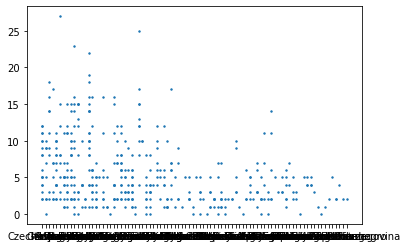

In [101]:
plt.scatter(Master['Team'].values, Master['Goals For'], s=2)
plt.show()

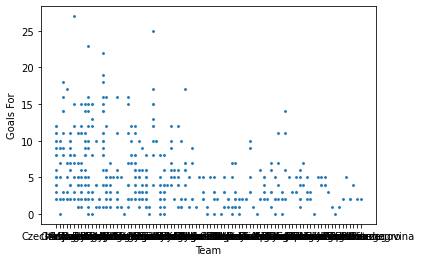

In [105]:
sns.scatterplot(x = Master['Team'], y = Master['Goals For'], s=10)
plt.show()

In [117]:
col_list = Master["Team"].values.tolist()
col_list2 = set(col_list)
print(col_list2)

{'South Korea', 'Morocco', 'Republic of Ireland', 'Kuwait', 'Jamaica', 'North Korea', 'Switzerland', 'Czechoslovakia', 'El Salvador', 'Greece', 'Yugoslavia', 'Ghana', 'Soviet Union', 'Ivory Coast', 'Turkey', 'Belgium', 'Slovakia', 'Netherlands', 'Egypt', 'West Germany', 'Norway', 'Zaire', 'Romania', 'Togo', 'Dutch East Indies', 'Haiti', 'France', 'Ecuador', 'Senegal', 'Trinidad and Tobago', 'Serbia', 'Cuba', 'New Zealand', 'Bolivia', 'East Germany', 'Canada', 'Serbia and Montenegro', 'South Africa', 'Brazil', 'Germany', 'Bulgaria', 'Bosnia and Herzegovina', 'United States', 'Australia', 'Czech Republic', 'Uruguay', 'Japan', 'Angola', 'Cameroon', 'China PR', 'Peru', 'Nigeria', 'Russia', 'Algeria', 'Austria', 'Italy', 'Chile', 'Denmark', 'Croatia', 'Ukraine', 'Panama', 'Bulgaria**', 'Iceland', 'Northern Ireland', 'Scotland', 'England', 'Sweden', 'Paraguay', 'Wales', 'Saudi Arabia', 'Slovenia', 'Argentina', 'Hungary', 'Tunisia', 'Mexico', 'Colombia', 'Iraq', 'FR Yugoslavia', 'Portugal', '

In [120]:
TeamDF = Master['Year'].copy()
print(TeamDF)

GoalsDF = Master['Goals For'].copy()
print(GoalsDF)

0     1934
1     1934
2     1934
3     1934
4     1934
      ... 
27    2018
28    2018
29    2018
30    2018
31    2018
Name: Year, Length: 444, dtype: int64
0     11
1      9
2     11
3      7
4      4
      ..
27     2
28     2
29     2
30     2
31     2
Name: Goals For, Length: 444, dtype: int64


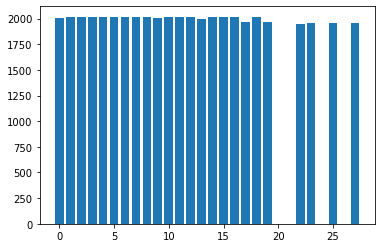

In [121]:
plt.bar(GoalsDF, TeamDF)
plt.show()

<AxesSubplot:xlabel='Goals For', ylabel='Count'>

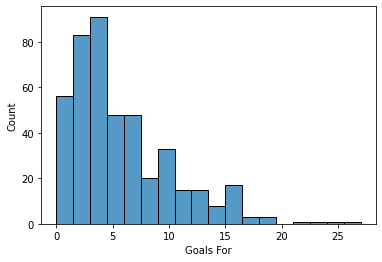

In [122]:
sns.histplot(Master['Goals For'])

In [123]:
Yearlist = Master["Year"].values.tolist()
Yearlist2 = set(Yearlist)
print(Yearlist2)

{1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974, 1978, 1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018}


In [124]:
Goallist = Master["Goals For"].values.tolist()

print(Goallist)

[11, 9, 11, 7, 4, 5, 5, 4, 2, 2, 2, 1, 2, 1, 2, 1, 11, 15, 14, 11, 5, 5, 5, 4, 4, 3, 5, 1, 1, 0, 0, 15, 22, 11, 10, 7, 4, 4, 2, 5, 4, 2, 2, 0, 25, 27, 17, 16, 11, 8, 8, 2, 10, 6, 3, 5, 2, 0, 0, 0, 16, 12, 23, 12, 4, 5, 6, 7, 9, 7, 4, 9, 5, 4, 2, 1, 14, 7, 10, 10, 8, 9, 4, 5, 3, 2, 3, 2, 4, 5, 1, 2, 11, 15, 17, 10, 4, 8, 2, 5, 2, 4, 4, 1, 2, 2, 1, 1, 19, 10, 17, 4, 6, 6, 9, 4, 2, 4, 4, 1, 5, 2, 2, 0, 13, 15, 16, 6, 7, 5, 12, 9, 3, 5, 1, 2, 1, 0, 2, 0, 15, 15, 10, 9, 6, 10, 7, 7, 3, 2, 5, 5, 1, 2, 3, 2, 12, 12, 11, 16, 15, 6, 7, 5, 5, 3, 8, 4, 5, 12, 8, 2, 1, 2, 2, 2, 2, 3, 2, 1, 14, 8, 12, 12, 10, 6, 11, 7, 10, 12, 3, 5, 4, 1, 2, 2, 2, 2, 1, 4, 2, 1, 1, 0, 15, 5, 10, 8, 8, 10, 7, 2, 4, 6, 6, 4, 4, 4, 3, 2, 4, 2, 2, 1, 3, 1, 2, 2, 11, 8, 15, 10, 9, 10, 8, 10, 7, 8, 4, 5, 4, 3, 5, 2, 1, 7, 4, 4, 1, 3, 2, 0, 15, 14, 11, 13, 8, 10, 8, 9, 7, 5, 4, 6, 8, 3, 5, 5, 8, 5, 3, 2, 1, 3, 3, 3, 2, 1, 2, 2, 1, 2, 1, 1, 18, 14, 10, 8, 10, 6, 7, 7, 5, 5, 4, 6, 5, 6, 5, 6, 5, 2, 5, 2, 6, 4, 2, 2, 3, 4, 1